# Grand Circus Capstrone Project 002
### Andrew & Joe's Data Analysis
![](https://upload.wikimedia.org/wikipedia/commons/thumb/6/69/IMDB_Logo_2016.svg/220px-IMDB_Logo_2016.svg.png)

IMDB MOVIES/SHOWS REPORT

Files available:
- **name.basics.tsv**
- title.akas.tsv
- **title.basics.tsv**
- title.crew.tsv
- title.episode.tsv
- title.principals.tsv
- **title.ratings.tsv**

### Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Setting up File Location Variables

In [2]:
#   Set the location of the files.
file_location = r"C:\Users\j\Downloads\Day039Data"

# Now add the names of the files to the location...
file1 = file_location + "\\name.basics.tsv"
file2 = file_location + "\\title.akas.tsv"
file3 = file_location + "\\title.basics.tsv"
file4 = file_location + "\\title.crew.tsv"
file5 = file_location + "\\title.episode.tsv"
file6 = file_location + "\\title.principals.tsv"
file7 = file_location + "\\title.ratings.tsv"

# #   Joe's paths...
# file1 = r'C:\Users\JMerten\OneDrive - KNEX\Downloads\DA2\name.basics.tsv/data.tsv'
# file2 = r'C:\Users\JMerten\OneDrive - KNEX\Downloads\DA2\title.akas.tsv/data.tsv'
# file3 = r'C:\Users\JMerten\OneDrive - KNEX\Downloads\DA2\title.basics.tsv/data.tsv'
# file4 = r'C:\Users\JMerten\OneDrive - KNEX\Downloads\DA2\title.crew.tsv/data.tsv'
# file5 = r'C:\Users\JMerten\OneDrive - KNEX\Downloads\DA2\title.episode.tsv/data.tsv'
# file6 = r'C:\Users\JMerten\OneDrive - KNEX\Downloads\DA2\title.principals.tsv/data.tsv'
# file7 = r'C:\Users\JMerten\OneDrive - KNEX\Downloads\DA2\title.ratings.tsv/data.tsv'

#   Andrew's paths
# file1 = 'name.basics.tsv/data.tsv'
# file2 = 'title.akas.tsv/data.tsv'
# file3 = 'title.basics.tsv/data.tsv'
# file4 = 'title.crew.tsv/data.tsv'
# file5 = 'title.episode.tsv/data.tsv'
# file6 = 'title.principals.tsv/data.tsv'
# file7 = 'title.ratings.tsv/data.tsv'

print(file1)
print(file2)
print(file3)
print(file4)
print(file5)
print(file6)
print(file7)


C:\Users\j\Downloads\Day039Data\name.basics.tsv
C:\Users\j\Downloads\Day039Data\title.akas.tsv
C:\Users\j\Downloads\Day039Data\title.basics.tsv
C:\Users\j\Downloads\Day039Data\title.crew.tsv
C:\Users\j\Downloads\Day039Data\title.episode.tsv
C:\Users\j\Downloads\Day039Data\title.principals.tsv
C:\Users\j\Downloads\Day039Data\title.ratings.tsv


## Reading in title.basics.tsv, name.basics.tsv and title.ratings.tsv
- movies_df = title.basics.tsv = file3
- ratings_df = title.ratings.tsv = file7
- actors_df = name.basics = file1

In [3]:
#   Column 4 from file3 is [isAdult] which we are not using, so we are not concerned about the DtypeWarning.
movies_df = pd.read_csv(file3, sep='\t')
ratings_df = pd.read_csv(file7, sep='\t')
actors_df = pd.read_csv(file1, sep='\t')

C:\Users\j\AppData\Local\Temp\ipykernel_13076\2946145977.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_df = pd.read_csv(file3, sep='\t')


## Filter Movies and Remove Those Missing Genre Information

In [4]:
# movies_df = pd.read_csv(file3, sep='\t')
movies_df = movies_df[movies_df['titleType'] == 'movie']  # Filter the DataFrame to include only movies (titleType == 'movie')

# Remove rows with missing genre information
movies_df = movies_df.dropna(subset=['genres'])

## Count Genres in Movies DataFrame using a loop and dictionary.


In [5]:
# Create a dictionary to store genre counts
genre_counts = {}

# Iterate over each row and count the genres
for genres in movies_df['genres']:
    genre_list = genres.split(',')
    for genre in genre_list:
        genre_counts[genre] = genre_counts.get(genre, 0) + 1


   ## Question 1. What are the Most Popular Genres?


In [6]:
# Find the genre with the highest count
most_popular_genre = max(genre_counts, key=genre_counts.get)
count = genre_counts[most_popular_genre]

print(f"The most popular genre is {most_popular_genre} with a count of {count}.")
print(genre_counts)


The most popular genre is Drama with a count of 234308.
{'Romance': 47318, 'Documentary': 122520, 'News': 1446, 'Sport': 7110, '\\N': 72148, 'Action': 53896, 'Adventure': 28089, 'Biography': 17263, 'Drama': 234308, 'Fantasy': 15341, 'Comedy': 109216, 'War': 9280, 'Crime': 37236, 'Family': 17671, 'History': 14265, 'Sci-Fi': 13928, 'Thriller': 44733, 'Western': 8153, 'Mystery': 17011, 'Horror': 37010, 'Music': 13628, 'Animation': 9099, 'Musical': 10233, 'Film-Noir': 881, 'Adult': 9243, 'Reality-TV': 515, 'Talk-Show': 175, 'Short': 47, 'Game-Show': 26}


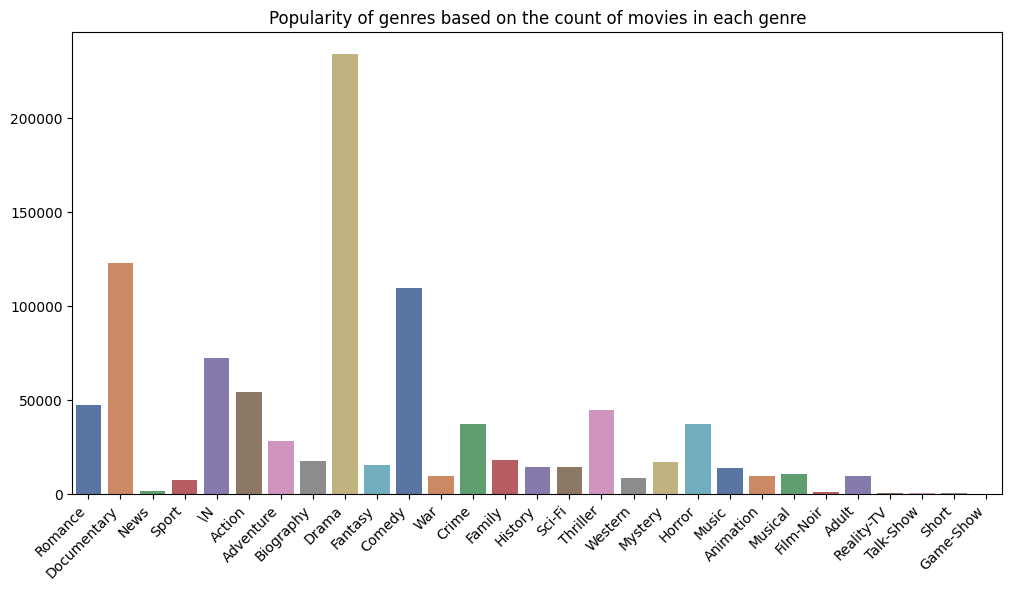

In [7]:
keys = list(genre_counts.keys())
# get values in the same order as keys, and parse percentage values
vals = [genre_counts[k] for k in keys]

plt.figure(figsize=(12, 6))
chart = sns.barplot(x=keys, y=vals, palette=sns.color_palette("deep", n_colors=len(keys)))
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title("Popularity of genres based on the count of movies in each genre")
plt.show()

##### The resulting chart is a bar plot showing the counts of each genre. Each genre is represented by a bar, and the height of the bar corresponds to the count. The x-axis displays the genres, and the y-axis represents the count values. The chart provides a visual representation of the popularity  of each genre. By looking at this graph we can conclude that Drama is the most popular genre.

## Merge DataFrames


In [8]:
# Merge basics_df and ratings_df on the 'tconst' column
merged_df = pd.merge(movies_df, ratings_df, on='tconst')


## Filter MERGED Movies and Remove Missing Information

In [9]:
# Filter the merged DataFrame to include only movies (titleType == 'movie')
movies_df = merged_df[merged_df['titleType'] == 'movie']

# Remove rows with missing genre or rating information
movies_df = movies_df.dropna(subset=['genres', 'averageRating'])


## Calculate Genre Ratings

In [10]:
# Create a dictionary to store genre ratings
genre_ratings = {}

# Iterate over each row and calculate the average rating for each genre
for index, row in movies_df.iterrows():
    genres = row['genres'].split(',')
    rating = row['averageRating']
    
    for genre in genres:
        if genre in genre_ratings:
            genre_ratings[genre].append(rating)
        else:
            genre_ratings[genre] = [rating]


In [11]:
# Calculate the average rating for each genre
average_ratings = {genre: sum(ratings) / len(ratings) for genre, ratings in genre_ratings.items()}

# Find the genre with the highest average rating
highest_rated_genre = max(average_ratings, key=average_ratings.get)
average_rating = average_ratings[highest_rated_genre]

print(f"The highest rated genre is {highest_rated_genre} with an average rating of {average_rating}.")


The highest rated genre is Game-Show with an average rating of 8.9.


## Filter Movies and Remove Missing Data


In [12]:
# Filter the merged DataFrame to include only movies (titleType == 'movie')
movies_df = merged_df[merged_df['titleType'] == 'movie']

# Remove rows with missing startYear or averageRating information
movies_df = movies_df.dropna(subset=['startYear', 'averageRating'])


## Create a new 'decade' column by rounding down the 'startYear' to the nearest 10


In [13]:
# Convert the 'startYear' column to numeric
movies_df['startYear'] = pd.to_numeric(movies_df['startYear'], errors='coerce')

# Create a new 'decade' column by rounding down the 'startYear' to the nearest 10
movies_df['decade'] = (movies_df['startYear'] // 10) * 10


## Group the DataFrame by 'decade' and calculate the average rating


In [14]:
average_ratings_by_decade = movies_df.groupby('decade')['averageRating'].mean()
decade_rating_df = average_ratings_by_decade.to_frame()

## Print the average ratings by decade - sorted by decade.

In [15]:
#   sorted(average_ratings_by_decade.keys())
print(average_ratings_by_decade)

decade
1890.0    4.450000
1900.0    4.465060
1910.0    5.795373
1920.0    6.106548
1930.0    6.093511
1940.0    6.209465
1950.0    6.216173
1960.0    6.149112
1970.0    5.961352
1980.0    6.014528
1990.0    6.031436
2000.0    6.206385
2010.0    6.243354
2020.0    6.383182
Name: averageRating, dtype: float64


### Print the average ratings by decade - sorted by rating.

In [16]:
print(average_ratings_by_decade.sort_index(ascending=False))

decade
2020.0    6.383182
2010.0    6.243354
2000.0    6.206385
1990.0    6.031436
1980.0    6.014528
1970.0    5.961352
1960.0    6.149112
1950.0    6.216173
1940.0    6.209465
1930.0    6.093511
1920.0    6.106548
1910.0    5.795373
1900.0    4.465060
1890.0    4.450000
Name: averageRating, dtype: float64


### Print the average ratings by decade - sorted by decade.

In [17]:
print(type(decade_rating_df))
print(decade_rating_df)

<class 'pandas.core.frame.DataFrame'>
        averageRating
decade               
1890.0       4.450000
1900.0       4.465060
1910.0       5.795373
1920.0       6.106548
1930.0       6.093511
1940.0       6.209465
1950.0       6.216173
1960.0       6.149112
1970.0       5.961352
1980.0       6.014528
1990.0       6.031436
2000.0       6.206385
2010.0       6.243354
2020.0       6.383182


 ### Question 2. How did movie ratings change through the decades?

<AxesSubplot: xlabel='decade', ylabel='averageRating'>

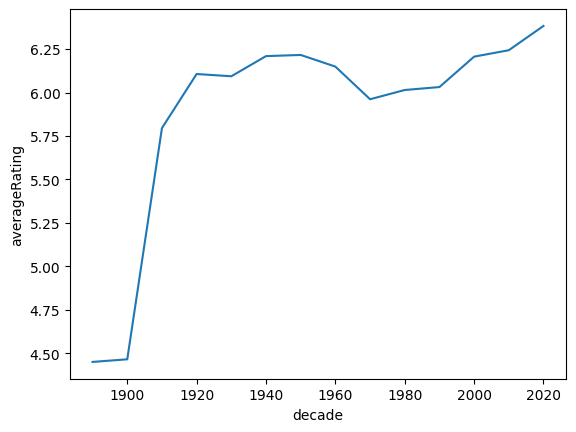

In [18]:
sns.lineplot(
    average_ratings_by_decade
)

##### The line graph shows the average ratings of movies over different decades. The x-axis represents the decades, while the y-axis represents the average rating. From the graph, we can observe the trend in movie ratings over time. The graph shows how the average rating has changed over time, indicating the overall perception of movie quality. Movies prior to 1920 are not well rated, movies after that time have varying rate.

### Visualization containing one quantitative and one categorical variable - Average Rating by genre - SETUP

In [19]:
print(average_ratings)
print(type(average_ratings))

{'Romance': 6.101201044386466, 'Documentary': 7.230423280423228, 'News': 7.21793313069908, 'Sport': 6.623001402524556, '\\N': 6.190131254317589, 'Action': 5.716132666247041, 'Adventure': 5.866273261239547, 'Biography': 6.961319920406795, 'Drama': 6.2512486988761875, 'Fantasy': 5.897194457064985, 'Comedy': 5.910983590612819, 'War': 6.409575340219739, 'Crime': 5.986335109532268, 'Family': 6.215616972273883, 'History': 6.810712524654867, 'Sci-Fi': 5.329512478235644, 'Thriller': 5.603034646572213, 'Western': 5.81935547647291, 'Mystery': 5.858538984263231, 'Horror': 5.003914117423522, 'Music': 6.682187730968262, 'Animation': 6.373674841772148, 'Musical': 6.180018805829807, 'Film-Noir': 6.466211604095564, 'Adult': 5.567387304507812, 'Reality-TV': 6.533962264150944, 'Talk-Show': 6.278571428571428, 'Short': 7.16875, 'Game-Show': 8.9}
<class 'dict'>


###   Question 3. Highest Average Rating by genre
Visualization containing one quantitative and one categorical variable

In [20]:
keys = list(average_ratings.keys())
# get values in the same order as keys, and parse percentage values
vals = [average_ratings[k] for k in keys]


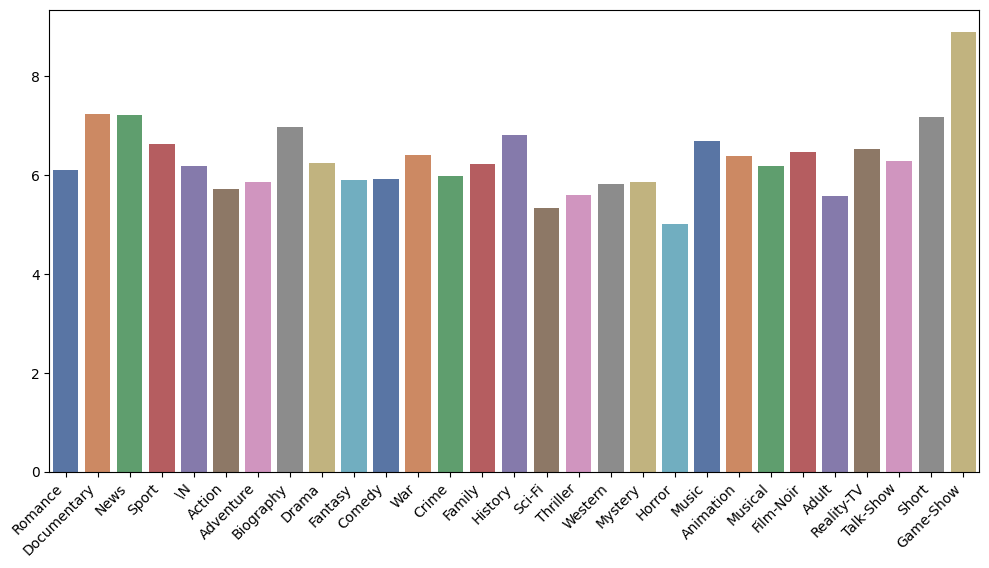

In [21]:
plt.figure(figsize=(12, 6))
chart = sns.barplot(x=keys, y=vals, palette=sns.color_palette("deep", n_colors=len(keys)))
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

##### The graph provides a clear overview of the highest rated genres, allowing you to identify those with a higher average ratings. It can help you make informed decisions or gain insights about the preferences of viewers based on how they rated each genre. Game-Show is the highest rated.

### By decade, who was the most popular actor/actress?

In [22]:
#  Then split the CSV into rows
#  df['Seatblocks'].str.split(' ').apply(Series, 1).stack()
# actor_movie_df = actors_df['knownForTitles'].str.split(',').apply(axis=1).stack()

# actor_movie_df = actors_df['knownForTitles'].apply(str.split(','), axis=1).stack()
print(actors_df.head(20))
print(pd.__version__)

       nconst          primaryName birthYear deathYear  \
0   nm0000001         Fred Astaire      1899      1987   
1   nm0000002        Lauren Bacall      1924      2014   
2   nm0000003      Brigitte Bardot      1934        \N   
3   nm0000004         John Belushi      1949      1982   
4   nm0000005       Ingmar Bergman      1918      2007   
5   nm0000006       Ingrid Bergman      1915      1982   
6   nm0000007      Humphrey Bogart      1899      1957   
7   nm0000008        Marlon Brando      1924      2004   
8   nm0000009       Richard Burton      1925      1984   
9   nm0000010         James Cagney      1899      1986   
10  nm0000011          Gary Cooper      1901      1961   
11  nm0000012          Bette Davis      1908      1989   
12  nm0000013            Doris Day      1922      2019   
13  nm0000014  Olivia de Havilland      1916      2020   
14  nm0000015           James Dean      1931      1955   
15  nm0000016      Georges Delerue      1925      1992   
16  nm0000017 

In [23]:
 # xref_df = actors_df['knownForTitles'].str.split(',')
# actors_df.explode(list(actors_df['knownForTitles'].str.split(',')))
# xref_df

#   Create a smaller copy to work with...
small_df = actors_df.head(20)
print(small_df)

       nconst          primaryName birthYear deathYear  \
0   nm0000001         Fred Astaire      1899      1987   
1   nm0000002        Lauren Bacall      1924      2014   
2   nm0000003      Brigitte Bardot      1934        \N   
3   nm0000004         John Belushi      1949      1982   
4   nm0000005       Ingmar Bergman      1918      2007   
5   nm0000006       Ingrid Bergman      1915      1982   
6   nm0000007      Humphrey Bogart      1899      1957   
7   nm0000008        Marlon Brando      1924      2004   
8   nm0000009       Richard Burton      1925      1984   
9   nm0000010         James Cagney      1899      1986   
10  nm0000011          Gary Cooper      1901      1961   
11  nm0000012          Bette Davis      1908      1989   
12  nm0000013            Doris Day      1922      2019   
13  nm0000014  Olivia de Havilland      1916      2020   
14  nm0000015           James Dean      1931      1955   
15  nm0000016      Georges Delerue      1925      1992   
16  nm0000017 

In [24]:
# small_df['knownForTitles'] = small_df['knownForTitles'].map(str)
# small_df['title_list'] = small_df['knownForTitles'].str.split(",")
small_df = actors_df.loc[:, ["primaryName","knownForTitles"]]
small_df['tconst'] = small_df['knownForTitles'].str.split(",")
small_df.shape

(12548289, 3)

In [34]:
exploded_df = small_df.explode('tconst')
exploded_df.describe()
exploded_df.shape

(22070636, 3)

### We now have the titles split out by actor.  Now we join to movies_df

In [35]:
merge_df = pd.merge(exploded_df, movies_df, on="tconst")
print(merge_df)

               primaryName                               knownForTitles  \
0             Fred Astaire      tt0053137,tt0072308,tt0050419,tt0045537   
1              Ava Gardner      tt0046085,tt0058404,tt0053137,tt0043899   
2              Ernest Gold     tt0053137,tt0053804,tt0057193,tt10539608   
3           Donna Anderson     tt0053137,tt0053946,tt0077031,tt13316728   
4          Ken Baumgartner                                    tt0053137   
...                    ...                                          ...   
6903969   Daniyar Alshinov  tt21379234,tt10867768,tt13294064,tt14902026   
6903970           Dahl Lee                          tt7936336,tt8757056   
6903971         Dongwoo Ko                tt7936336,tt8757056,tt2746314   
6903972  Ariane Figueiredo                                    tt8742566   
6903973        Tin Brendel              tt8742566,tt21359716,tt23633428   

             tconst titleType                        primaryTitle  \
0         tt0053137     movie 

In [36]:
# Compute the decade by rounding
sum_df = merge_df.loc[:, ["primaryName", "averageRating", "startYear"]]
sum_df['decade'] = round(sum_df["startYear"], -1)
print(sum_df)

               primaryName  averageRating  startYear  decade
0             Fred Astaire            7.1     1959.0  1960.0
1              Ava Gardner            7.1     1959.0  1960.0
2              Ernest Gold            7.1     1959.0  1960.0
3           Donna Anderson            7.1     1959.0  1960.0
4          Ken Baumgartner            7.1     1959.0  1960.0
...                    ...            ...        ...     ...
6903969   Daniyar Alshinov            6.4     2021.0  2020.0
6903970           Dahl Lee            8.7     2017.0  2020.0
6903971         Dongwoo Ko            8.7     2017.0  2020.0
6903972  Ariane Figueiredo            4.4     2020.0  2020.0
6903973        Tin Brendel            4.4     2020.0  2020.0

[6903974 rows x 4 columns]


### Get the average rating for each actor/actress by decade.

In [37]:
# Get the average rating for each actor/actress by decade.
decade_df = sum_df.groupby(['decade', 'primaryName'], as_index=False).mean()
decade_df

,decade,primaryName,averageRating,startYear
0,1890.0,Alexander Black,5.30,1894.0
1,1890.0,Blanche Bayliss,5.30,1894.0
2,1890.0,Chauncey Depew,5.30,1894.0
3,1890.0,William Courtenay,5.30,1894.0
4,1900.0,Anna Held,7.00,1901.0
...,...,...,...,...
4786032,2020.0,Þórður Hólm Hálfdánarson,5.80,2018.0
4786033,2020.0,Þórður Kalman Friðriksson,5.80,2018.0
4786034,2020.0,Þórður Karl Einarsson,5.45,2016.5
4786035,2020.0,Þórður Sveinbjörnsson,6.80,2019.5


### Find the actor/actress that has the max(averageRating) for each decade

In [38]:
# decade_df['averageRating'].idxmax()
# decade_df[['points', 'rebounds']].max(axis=1)
decade_df.groupby(['decade', 'primaryName'])['averageRating'].max()

decade  primaryName              
1890.0  Alexander Black              5.30
        Blanche Bayliss              5.30
        Chauncey Depew               5.30
        William Courtenay            5.30
1900.0  Anna Held                    7.00
                                     ... 
2020.0  Þórður Hólm Hálfdánarson     5.80
        Þórður Kalman Friðriksson    5.80
        Þórður Karl Einarsson        5.45
        Þórður Sveinbjörnsson        6.80
        þórður Bogason               4.50
Name: averageRating, Length: 4786037, dtype: float64

In [39]:
decade_df.groupby(['decade'])['averageRating'].max()

decade
1890.0     5.3
1900.0     7.0
1910.0     9.0
1920.0     9.2
1930.0     9.3
1940.0     9.7
1950.0     9.8
1960.0     9.8
1970.0    10.0
1980.0     9.8
1990.0     9.8
2000.0    10.0
2010.0    10.0
2020.0    10.0
Name: averageRating, dtype: float64

### Now, display the most popular actor/actress by decade based upon the movie ratings for the movies they were in.

In [40]:
# Group by decade and primaryName, and find the maximum average rating
max_ratings_series = decade_df.groupby(['decade', 'primaryName'])['averageRating'].max()

# Convert max_ratings to a DataFrame
max_ratings_df = max_ratings_series.to_frame(name='averageRating').reset_index()

# Get the corresponding actor/actress for each maximum average rating
actor_with_highest_rating = max_ratings_df.loc[max_ratings_df.groupby('decade')['averageRating'].idxmax()]
highest_rated_actor = actor_with_highest_rating.loc[actor_with_highest_rating['averageRating'].idxmax()]

print("---===***   Most popular actor by decade based on movie ratings ***===---")
print(actor_with_highest_rating)

# print("Decade:", highest_rated_actor['decade'])
# print("Highest Rated Actor/Actress:", highest_rated_actor['primaryName'])
# print("Average Rating:", highest_rated_actor['averageRating'])

---===***   Most popular actor by decade based on movie ratings ***===---
         decade                   primaryName  averageRating
0        1890.0               Alexander Black            5.3
4        1900.0                     Anna Held            7.0
633      1910.0           Eleonora Mihailescu            9.0
3302     1920.0                 Antonio Somma            9.2
20304    1930.0           Christa Anita Brück            9.3
56645    1940.0                    Eva Bodden            9.7
100361   1950.0                   Anita Linda            9.8
178095   1960.0                  Chiqui Somes            9.8
299798   1970.0                Carol M. Burns           10.0
473417   1980.0               Boyani Subbarao            9.8
801706   1990.0               Chi-Chi Atienza            9.8
1196446  2000.0                Aurora Lazagna           10.0
1956693  2010.0             Anahid Aprahamian           10.0
3202705  2020.0  'Stone Cold' Ralph Guastella           10.0


### Ratings of all actors by decade.

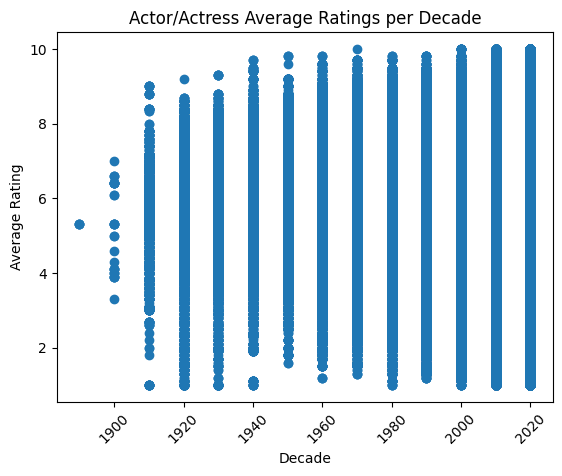

In [41]:
# decade_df.head(10)
plt.scatter(decade_df['decade'], decade_df['averageRating'])

plt.xlabel('Decade')
plt.ylabel('Average Rating')
plt.title('Actor/Actress Average Ratings per Decade')

plt.xticks(rotation=45)

plt.show()

### feedback
- pacing
- organization of questions/charts
- titles
- final coclusion
- what is my problem/
  - violin or box plot
  - histogram - gradient & sort